In [144]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [145]:
df = pd.read_csv('LoanData.csv', low_memory=False)
df.head()

,ReportAsOfEOD,LoanId,LoanNumber,ListedOnUTC,BiddingStartedOn,BidsPortfolioManager,BidsApi,BidsManual,PartyId,NewCreditCustomer,...,PreviousEarlyRepaymentsCountBeforeLoan,GracePeriodStart,GracePeriodEnd,NextPaymentDate,NextPaymentNr,NrOfScheduledPayments,ReScheduledOn,PrincipalDebtServicingCost,InterestAndPenaltyDebtServicingCost,ActiveLateLastPaymentCategory
0,2022-06-11,66AE108B-532B-4BB3-BAB7-0019A46412C1,483449,2016-03-23 16:07:19,2016-03-23 16:07:19,970,1150.0,5.0,{EBF05573-554D-4A3B-BC77-A2CF00B7D110},False,...,0.0,2019-10-28,2020-01-27,NaN,NaN,NaN,NaN,0.00,63.11,16-30
1,2022-06-11,A6635EA6-2F39-4DEA-AA3B-001C9521BE7C,2819530,2022-05-31 15:11:34,2022-05-31 18:11:34,16,0.0,0.0,{F6507F91-F992-41FA-BB4C-AC37009B3E58},False,...,0.0,NaN,NaN,2022-07-11,2.0,60.0,NaN,NaN,NaN,NaN
2,2022-06-11,D152382E-A50D-46ED-8FF2-0053E0C86A70,378148,2015-06-25 11:02:28,2015-06-25 11:02:28,1295,0.0,1705.0,{46C6CBA4-0FBE-44AD-9304-A3EF0111A5FB},False,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.00,136.62,16-30
3,2022-06-11,87342E13-66CB-483F-833A-007953E50C78,451831,2016-01-14 10:00:21,2016-01-14 10:00:21,2700,565.0,5835.0,{CA64DA9B-8E95-450E-9EFE-A58601016DB2},True,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,259.67,1659.60,180+
4,2022-06-11,87227056-6BF9-410C-98D1-008F788E122A,349381,2015-03-24 15:55:44,2015-03-24 15:55:44,1115,0.0,385.0,{F08F654D-DB2E-4C4B-8C90-A46100FCE7B6},True,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.00,215.05,180+


In [146]:
len(df)

240440

In [147]:
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240440 entries, 0 to 240439
Data columns (total 112 columns):
 #    Column                                  Non-Null Count   Dtype  
---   ------                                  --------------   -----  
 0    ReportAsOfEOD                           240440 non-null  object 
 1    LoanId                                  240440 non-null  object 
 2    LoanNumber                              240440 non-null  int64  
 3    ListedOnUTC                             240440 non-null  object 
 4    BiddingStartedOn                        240440 non-null  object 
 5    BidsPortfolioManager                    240440 non-null  int64  
 6    BidsApi                                 240440 non-null  float64
 7    BidsManual                              240440 non-null  float64
 8    PartyId                                 240440 non-null  object 
 9    NewCreditCustomer                       240440 non-null  bool   
 10   LoanApplicationStartedDate    

In [148]:
pd.options.display.max_rows = 4000
unique = df.nunique()
unique

ReportAsOfEOD                                  1
LoanId                                    240440
LoanNumber                                240440
ListedOnUTC                               239171
BiddingStartedOn                          239172
BidsPortfolioManager                        5814
BidsApi                                     1287
BidsManual                                  4461
PartyId                                   111401
NewCreditCustomer                              2
LoanApplicationStartedDate                239304
LoanDate                                    4367
ContractEndDate                             4670
FirstPaymentDate                            2691
MaturityDate_Original                       3859
MaturityDate_Last                           4630
ApplicationSignedHour                         24
ApplicationSignedWeekday                       7
VerificationType                               5
LanguageCode                                  13
Age                 

In [149]:
df['VerificationType']

0         4.0
1         4.0
2         1.0
3         4.0
4         3.0
         ... 
240435    1.0
240436    1.0
240437    1.0
240438    4.0
240439    4.0
Name: VerificationType, Length: 240440, dtype: float64

selecting the relevant columns after reading the dataset description

In [150]:
df = df[['Age', 'Gender', 'VerificationType','NewCreditCustomer', 'AppliedAmount', 
'UseOfLoan','MonthlyPayment', 'Country', 'Interest','LoanDuration', 'Education', 'MaritalStatus', 'NrOfDependants', 
'EmploymentStatus', 'EmploymentDurationCurrentEmployer', 'WorkExperience', 'OccupationArea', 
'HomeOwnershipType', 'IncomeTotal', 'ExistingLiabilities', 'LiabilitiesTotal', 'RefinanceLiabilities', 
'DebtToIncome', 'FreeCash', 'CreditScoreEsMicroL', 'CreditScoreEsEquifaxRisk', 
'CreditScoreFiAsiakasTietoRiskGrade', 'CreditScoreEeMini', 'NoOfPreviousLoansBeforeLoan', 
'AmountOfPreviousLoansBeforeLoan', 'PreviousRepaymentsBeforeLoan', 'PreviousEarlyRepaymentsBefoleLoan',
'PreviousEarlyRepaymentsCountBeforeLoan', 'DefaultDate', 'Status']]

In [151]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240440 entries, 0 to 240439
Data columns (total 35 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   Age                                     240440 non-null  int64  
 1   Gender                                  240395 non-null  float64
 2   VerificationType                        240390 non-null  float64
 3   NewCreditCustomer                       240440 non-null  bool   
 4   AppliedAmount                           240440 non-null  float64
 5   UseOfLoan                               240440 non-null  int64  
 6   MonthlyPayment                          233750 non-null  float64
 7   Country                                 240440 non-null  object 
 8   Interest                                240440 non-null  float64
 9   LoanDuration                            240440 non-null  int64  
 10  Education                               2403

checking the number of missing values

In [152]:
df.isnull().sum()

Age                                            0
Gender                                        45
VerificationType                              50
NewCreditCustomer                              0
AppliedAmount                                  0
UseOfLoan                                      0
MonthlyPayment                              6690
Country                                        0
Interest                                       0
LoanDuration                                   0
Education                                     50
MaritalStatus                                 50
NrOfDependants                            204840
EmploymentStatus                             202
EmploymentDurationCurrentEmployer           3358
WorkExperience                            203918
OccupationArea                                91
HomeOwnershipType                           1657
IncomeTotal                                    0
ExistingLiabilities                            0
LiabilitiesTotal    

Exploring the status column

In [153]:
df['Status'].unique()

array(['Late', 'Current', 'Repaid'], dtype=object)

In [154]:
df.isnull().sum()

Age                                            0
Gender                                        45
VerificationType                              50
NewCreditCustomer                              0
AppliedAmount                                  0
UseOfLoan                                      0
MonthlyPayment                              6690
Country                                        0
Interest                                       0
LoanDuration                                   0
Education                                     50
MaritalStatus                                 50
NrOfDependants                            204840
EmploymentStatus                             202
EmploymentDurationCurrentEmployer           3358
WorkExperience                            203918
OccupationArea                                91
HomeOwnershipType                           1657
IncomeTotal                                    0
ExistingLiabilities                            0
LiabilitiesTotal    

Get the percentage of missing values for each column 

In [155]:
pd.set_option('display.max_rows', None)
df.isnull().sum()/len(df)* 100

Age                                        0.000000
Gender                                     0.018716
VerificationType                           0.020795
NewCreditCustomer                          0.000000
AppliedAmount                              0.000000
UseOfLoan                                  0.000000
MonthlyPayment                             2.782399
Country                                    0.000000
Interest                                   0.000000
LoanDuration                               0.000000
Education                                  0.020795
MaritalStatus                              0.020795
NrOfDependants                            85.193811
EmploymentStatus                           0.084013
EmploymentDurationCurrentEmployer          1.396606
WorkExperience                            84.810348
OccupationArea                             0.037847
HomeOwnershipType                          0.689153
IncomeTotal                                0.000000
ExistingLiab

### Dropping columns with lots of missing values. 

For loans that are late, they cannot be classified as defaulted because although the repayment is just late and not defaulted. A loan becomes defaulted when the borrower fails to make payment 60 days after the grace period (according to https://ccr.equifax.com.au/resources/explaining-the-difference-between-a-late-payment-and-a-default-to-your-customers#:~:text=Repayment%20history%20information%20is%20recorded,was%20in%20a%20specific%20month.&text=A%20payment%20later%20than%2060%20days%20is%20a%20default.) Since this date can only be defined by the loan company, this might be difficult to achieve. However, the loan company has provided us with a Defaultdate column which is the date the loan went into defaulted state. 

This means for rows or borrowers that have a default date, the borrower is assumed to have defaulted the payment of the loan. This means that the default date is what will be used to determine whether a borrower has defaulted a loan or not. This also means that the defaultdate column cannot be dropped. 

In [156]:
df = df.drop(columns=['NrOfDependants', 'WorkExperience', 'CreditScoreEsMicroL', 
'CreditScoreEsEquifaxRisk', 'CreditScoreFiAsiakasTietoRiskGrade', 'CreditScoreEeMini', 
'PreviousRepaymentsBeforeLoan', 'PreviousEarlyRepaymentsBefoleLoan'])
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240440 entries, 0 to 240439
Data columns (total 27 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   Age                                     240440 non-null  int64  
 1   Gender                                  240395 non-null  float64
 2   VerificationType                        240390 non-null  float64
 3   NewCreditCustomer                       240440 non-null  bool   
 4   AppliedAmount                           240440 non-null  float64
 5   UseOfLoan                               240440 non-null  int64  
 6   MonthlyPayment                          233750 non-null  float64
 7   Country                                 240440 non-null  object 
 8   Interest                                240440 non-null  float64
 9   LoanDuration                            240440 non-null  int64  
 10  Education                               2403

Creating the default column using the rows that have a defaultdate value

In [157]:
df['DefaultDate'].isnull()


df['DefaultStatus'] = df['DefaultDate'].fillna('').apply(lambda x: 0 if x=='' else 1)
df['DefaultStatus'].value_counts()

0    159123
1     81317
Name: DefaultStatus, dtype: int64

This means 150123 borrowers did not default on their loan since their default date is null. This is also confirmed below.

0 = Did not default
1 = Defaulted

In [158]:
df['DefaultDate'].isnull().sum()

159123

In [159]:
df.corr()

,Age,Gender,VerificationType,NewCreditCustomer,AppliedAmount,UseOfLoan,MonthlyPayment,Interest,LoanDuration,Education,...,IncomeTotal,ExistingLiabilities,LiabilitiesTotal,RefinanceLiabilities,DebtToIncome,FreeCash,NoOfPreviousLoansBeforeLoan,AmountOfPreviousLoansBeforeLoan,PreviousEarlyRepaymentsCountBeforeLoan,DefaultStatus
Age,1.000000,0.033175,-0.030722,-0.049172,0.089733,-0.092404,0.048114,-0.046524,0.066457,0.083127,...,0.018240,0.069228,0.003467,-0.029197,-0.056444,-0.013912,0.045538,0.099155,-0.000702,0.007479
Gender,0.033175,1.000000,0.125324,0.111295,-0.027141,0.040499,0.008426,0.171666,0.065948,0.069278,...,-0.013153,-0.052656,0.004323,0.034473,0.066555,-0.005442,-0.080302,-0.097857,-0.030940,0.032530
VerificationType,-0.030722,0.125324,1.000000,0.096072,0.038192,-0.151672,-0.042793,0.005632,0.143126,-0.005068,...,0.010687,-0.081974,0.000613,0.039977,-0.080005,-0.068783,-0.120113,-0.082252,-0.053974,-0.138522
NewCreditCustomer,-0.049172,0.111295,0.096072,1.000000,0.088616,0.065061,0.142166,0.226654,-0.033420,-0.069158,...,0.011514,-0.386865,-0.000645,0.054519,0.049394,0.041497,-0.603651,-0.625608,-0.104904,0.112726
AppliedAmount,0.089733,-0.027141,0.038192,0.088616,1.000000,-0.006766,0.789767,-0.030791,0.255787,0.035395,...,0.016015,-0.084835,-0.000917,0.090548,0.114961,0.033975,-0.157201,-0.074147,-0.004650,0.071169
UseOfLoan,-0.092404,0.040499,-0.151672,0.065061,-0.006766,1.000000,0.085239,0.065077,-0.157060,0.059758,...,-0.000067,0.113360,0.003752,0.151395,0.633781,0.247391,-0.088936,-0.117628,0.058524,0.132972
MonthlyPayment,0.048114,0.008426,-0.042793,0.142166,0.789767,0.085239,1.000000,0.239114,-0.069177,0.045869,...,0.021337,-0.139420,-0.000503,0.007548,0.186567,0.032797,-0.182893,-0.130839,-0.005261,0.152767
Interest,-0.046524,0.171666,0.005632,0.226654,-0.030791,0.065077,0.239114,1.000000,-0.013508,0.026497,...,-0.000451,-0.153638,0.003507,0.004340,0.091508,0.017672,-0.193513,-0.205709,-0.029416,0.336683
LoanDuration,0.066457,0.065948,0.143126,-0.033420,0.255787,-0.157060,-0.069177,-0.013508,1.000000,-0.025342,...,-0.004837,-0.023231,-0.001079,-0.034103,-0.109213,-0.040354,0.018137,0.069808,-0.004275,0.000380
Education,0.083127,0.069278,-0.005068,-0.069158,0.035395,0.059758,0.045869,0.026497,-0.025342,1.000000,...,0.005673,0.120116,-0.000998,0.025078,0.064388,0.034846,0.071287,0.097566,0.022171,0.015560


In [160]:
df.columns

Index(['Age', 'Gender', 'VerificationType', 'NewCreditCustomer',
       'AppliedAmount', 'UseOfLoan', 'MonthlyPayment', 'Country', 'Interest',
       'LoanDuration', 'Education', 'MaritalStatus', 'EmploymentStatus',
       'EmploymentDurationCurrentEmployer', 'OccupationArea',
       'HomeOwnershipType', 'IncomeTotal', 'ExistingLiabilities',
       'LiabilitiesTotal', 'RefinanceLiabilities', 'DebtToIncome', 'FreeCash',
       'NoOfPreviousLoansBeforeLoan', 'AmountOfPreviousLoansBeforeLoan',
       'PreviousEarlyRepaymentsCountBeforeLoan', 'DefaultDate', 'Status',
       'DefaultStatus'],
      dtype='object')

In [161]:
df.head()

,Age,Gender,VerificationType,NewCreditCustomer,AppliedAmount,UseOfLoan,MonthlyPayment,Country,Interest,LoanDuration,...,LiabilitiesTotal,RefinanceLiabilities,DebtToIncome,FreeCash,NoOfPreviousLoansBeforeLoan,AmountOfPreviousLoansBeforeLoan,PreviousEarlyRepaymentsCountBeforeLoan,DefaultDate,Status,DefaultStatus
0,53,1.0,4.0,False,2125.0,2,62.05,EE,20.97,60,...,485.09,6,26.29,10.92,1.0,500.0,0.0,2020-01-14,Late,1
1,25,0.0,4.0,False,531.0,-1,16.67,EE,25.27,60,...,0.00,0,0.00,0.00,8.0,8609.0,0.0,NaN,Current,0
2,50,1.0,1.0,False,3000.0,3,84.75,EE,17.12,60,...,736.45,0,30.58,78.80,1.0,1800.0,1.0,2016-06-02,Repaid,1
3,44,0.0,4.0,True,10630.0,3,268.57,EE,13.67,60,...,905.00,3,26.71,349.43,0.0,0.0,0.0,2017-12-06,Repaid,1
4,42,0.0,3.0,True,1500.0,2,63.53,ES,40.40,60,...,350.00,0,7.36,449.47,0.0,0.0,1.0,2016-02-19,Late,1


In [162]:
df2 = df.copy()

for i, row in df2.iterrows(): 
    if row['Gender'] == 0: 
        df2.loc[i, 'Gender'] = 'Male'
    elif row['Gender'] == 1: 
        df2.loc[i, 'Gender'] = 'Woman'
    else: 
        df2.loc[i, 'Gender'] = 'Undefined'
    if row['VerificationType'] == 4: 
        df2.loc[i, 'VerificationType'] = 'Income and expenses verified'
    elif row['VerificationType'] == 3: 
        df2.loc[i, 'VerificationType'] = 'Income verified'
    elif row['VerificationType'] == 2: 
        df2.loc[i, 'VerificationType'] = 'Income unverified, cross-referenced by phone'
    elif row['VerificationType'] == 1: 
        df2.loc[i, 'VerificationType'] = 'Income unverified'
    else: 
        df2.loc[i, 'VerificationType'] = 'Not set'
    if row['UseOfLoan'] == 0: 
        df2.loc[i, 'UseOfLoan'] = 'Loan consolidation'
    elif row['UseOfLoan'] == 1: 
        df2.loc[i, 'UseOfLoan'] = 'Real estate'
    elif row['UseOfLoan'] == 2: 
        df2.loc[i, 'UseOfLoan'] = 'Home improvement'
    elif row['UseOfLoan'] == 3: 
        df2.loc[i, 'UseOfLoan'] = 'Business'
    elif row['UseOfLoan'] == 4: 
        df2.loc[i, 'UseOfLoan'] = 'Education'
    elif row['UseOfLoan'] == 5: 
        df2.loc[i, 'UseOfLoan'] = 'Travel'
    elif row['UseOfLoan'] == 6: 
        df2.loc[i, 'UseOfLoan'] = 'Vehicle'
    elif row['UseOfLoan'] == 7: 
        df2.loc[i, 'UseOfLoan'] = 'Other'
    elif row['UseOfLoan'] == 8: 
        df2.loc[i, 'UseOfLoan'] = 'Health'
    elif row['UseOfLoan'] == 101: 
        df2.loc[i, 'UseOfLoan'] = 'Working capital financing'
    elif row['UseOfLoan'] == 102: 
        df2.loc[i, 'UseOfLoan'] = 'Purchase of machinery equipment'
    elif row['UseOfLoan'] == 103: 
        df2.loc[i, 'UseOfLoan'] = 'Renovation of real estate'
    elif row['UseOfLoan'] == 104: 
        df2.loc[i, 'UseOfLoan'] = 'Accounts receivable financing'
    elif row['UseOfLoan'] == 105: 
        df2.loc[i, 'UseOfLoan'] = 'Acquisition of means of transport'
    elif row['UseOfLoan'] == 106: 
        df2.loc[i, 'UseOfLoan'] = 'Construction finance'
    elif row['UseOfLoan'] == 107: 
        df2.loc[i, 'UseOfLoan'] = 'Acquisition of stocks'
    elif row['UseOfLoan'] == 108: 
        df2.loc[i, 'UseOfLoan'] = 'Acquisition of real estate'
    elif row['UseOfLoan'] == 109: 
        df2.loc[i, 'UseOfLoan'] = 'Guaranteeing obligation'
    elif row['UseOfLoan'] == 110: 
        df2.loc[i, 'UseOfLoan'] = 'Other business All codes in format'
    else:
        df2.loc[i, 'UseOfLoan'] = 'Business loans that are not supported since October 2012'
    if row['Education'] == 1: 
        df2.loc[i, 'Education'] = 'Primary education'
    elif row['Education'] == 2: 
        df2.loc[i, 'Education'] = 'Basic education'
    elif row['Education'] == 3: 
        df2.loc[i, 'Education'] = 'Vocational education'
    elif row['Education'] == 4: 
        df2.loc[i, 'Education'] = 'Secondary education'
    else: 
        df2.loc[i, 'Education'] = 'Higher education'
    if row['MaritalStatus'] == 1: 
        df2.loc[i, 'MaritalStatus'] = 'Married'
    elif row['MaritalStatus'] == 2: 
        df2.loc[i, 'MaritalStatus'] = 'Cohabitant'  
    elif row['MaritalStatus'] == 3: 
        df2.loc[i, 'MaritalStatus'] = 'Single'  
    elif row['MaritalStatus'] == 4: 
        df2.loc[i, 'MaritalStatus'] = 'Divorced' 
    else: 
        df2.loc[i, 'MaritalStatus'] = 'Widow' 
    if row['EmploymentStatus'] == 1: 
        df2.loc[i, 'EmploymentStatus'] = 'Unemployed'
    elif row['EmploymentStatus'] == 2: 
        df2.loc[i, 'EmploymentStatus'] = 'Partially employed'
    elif row['EmploymentStatus'] == 3: 
        df2.loc[i, 'EmploymentStatus'] = 'Fully employed'
    elif row['EmploymentStatus'] == 4: 
        df2.loc[i, 'EmploymentStatus'] = 'Self-employed'
    elif row['EmploymentStatus'] == 5: 
        df2.loc[i, 'EmploymentStatus'] = 'Entrepreneur'
    else:
        df2.loc[i, 'EmploymentStatus'] = 'Retiree'
    if row['OccupationArea'] == 2: 
        df2.loc[i, 'OccupationArea'] = 'Mining'
    elif row['OccupationArea'] == 3: 
        df2.loc[i, 'OccupationArea'] = 'Processing'
    elif row['OccupationArea'] == 4: 
        df2.loc[i, 'OccupationArea'] = 'Energy'
    elif row['OccupationArea'] == 5: 
        df2.loc[i, 'OccupationArea'] = 'Utilities'
    elif row['OccupationArea'] == 6: 
        df2.loc[i, 'OccupationArea'] = 'Construction'
    elif row['OccupationArea'] == 7: 
        df2.loc[i, 'OccupationArea'] = 'Retail and wholesale'
    elif row['OccupationArea'] == 8: 
        df2.loc[i, 'OccupationArea'] = 'Transport and warehousing'
    elif row['OccupationArea'] == 9: 
        df2.loc[i, 'OccupationArea'] = 'Hospitality and catering'
    elif row['OccupationArea'] == 10: 
        df2.loc[i, 'OccupationArea'] = 'Info and telecom'
    elif row['OccupationArea'] == 11: 
        df2.loc[i, 'OccupationArea'] = 'Finance and insurance'
    elif row['OccupationArea'] == 12: 
        df2.loc[i, 'OccupationArea'] = 'Real-estate'
    elif row['OccupationArea'] == 13: 
        df2.loc[i, 'OccupationArea'] = 'Research'
    elif row['OccupationArea'] == 14: 
        df2.loc[i, 'OccupationArea'] = 'Administrative'
    elif row['OccupationArea'] == 15: 
        df2.loc[i, 'OccupationArea'] = 'Civil service & military'
    elif row['OccupationArea'] == 16: 
        df2.loc[i, 'OccupationArea'] = 'Education'
    elif row['OccupationArea'] == 17: 
        df2.loc[i, 'OccupationArea'] = 'Healthcare and social help'
    elif row['OccupationArea'] == 18: 
        df2.loc[i, 'OccupationArea'] = 'Art and entertainment'
    elif row['OccupationArea'] == 19: 
        df2.loc[i, 'OccupationArea'] = 'Agriculture, forestry and fishing'
    else: 
        df2.loc[i, 'OccupationArea'] = 'Other'
    if row['HomeOwnershipType'] == 0: 
        df2.loc[i, 'HomeOwnershipType'] = 'Homeless'
    elif row['HomeOwnershipType'] == 1: 
        df2.loc[i, 'HomeOwnershipType'] = 'Owner'
    elif row['HomeOwnershipType'] == 2: 
        df2.loc[i, 'HomeOwnershipType'] = 'Living with parents'
    elif row['HomeOwnershipType'] == 3: 
        df2.loc[i, 'HomeOwnershipType'] = 'Tenant, pre-furnished property'
    elif row['HomeOwnershipType'] == 4: 
        df2.loc[i, 'HomeOwnershipType'] = 'Tenant, unfurnished property'
    elif row['HomeOwnershipType'] == 5: 
        df2.loc[i, 'HomeOwnershipType'] = 'Council house'
    elif row['HomeOwnershipType'] == 6: 
        df2.loc[i, 'HomeOwnershipType'] = 'Joint tenant'
    elif row['HomeOwnershipType'] == 7: 
        df2.loc[i, 'HomeOwnershipType'] = 'Joint ownership'
    elif row['HomeOwnershipType'] == 8: 
        df2.loc[i, 'HomeOwnershipType'] = 'Mortgage'
    elif row['HomeOwnershipType'] == 9: 
        df2.loc[i, 'HomeOwnershipType'] = 'Owner with encumbrance'
    else: 
        df2.loc[i, 'HomeOwnershipType'] = 'Other'
    if row['DefaultStatus'] == 0: 
        df2.loc[i, 'DefaultStatus'] = 'Did Not Default'
    else:
        df2.loc[i, 'DefaultStatus'] = 'Defaulted'
    
    
    
df2.head()

,Age,Gender,VerificationType,NewCreditCustomer,AppliedAmount,UseOfLoan,MonthlyPayment,Country,Interest,LoanDuration,...,LiabilitiesTotal,RefinanceLiabilities,DebtToIncome,FreeCash,NoOfPreviousLoansBeforeLoan,AmountOfPreviousLoansBeforeLoan,PreviousEarlyRepaymentsCountBeforeLoan,DefaultDate,Status,DefaultStatus
0,53,Woman,Income and expenses verified,False,2125.0,Home improvement,62.05,EE,20.97,60,...,485.09,6,26.29,10.92,1.0,500.0,0.0,2020-01-14,Late,Defaulted
1,25,Male,Income and expenses verified,False,531.0,Business loans that are not supported since Oc...,16.67,EE,25.27,60,...,0.00,0,0.00,0.00,8.0,8609.0,0.0,NaN,Current,Did Not Default
2,50,Woman,Income unverified,False,3000.0,Business,84.75,EE,17.12,60,...,736.45,0,30.58,78.80,1.0,1800.0,1.0,2016-06-02,Repaid,Defaulted
3,44,Male,Income and expenses verified,True,10630.0,Business,268.57,EE,13.67,60,...,905.00,3,26.71,349.43,0.0,0.0,0.0,2017-12-06,Repaid,Defaulted
4,42,Male,Income verified,True,1500.0,Home improvement,63.53,ES,40.40,60,...,350.00,0,7.36,449.47,0.0,0.0,1.0,2016-02-19,Late,Defaulted


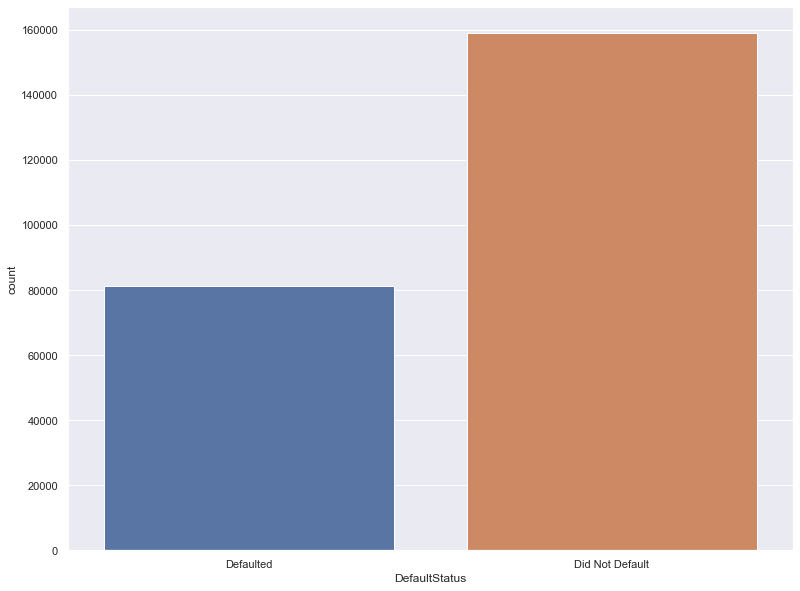

In [163]:
sns.set_theme(style="whitegrid")
sns.set(rc = {'figure.figsize':(13,10)})
ax = sns.countplot(x='DefaultStatus', data=df2)

In [164]:
df2.to_csv('FullyProcessedData.csv', index=False)

Since the status column for a new applicant cannot be known, it will be dropped. 

Also, since the default date cannot be known and it has been used to determine if the applicant defaulted or not, it will also be dropped. 

We can also drop the country column as it doesn't really bears no relevance to determining if an individual will default on his/her loan repayment. 

In [165]:
df.drop(columns=['Status', 'DefaultDate'], inplace=True)
len(df.columns)

26

### Data Exploration

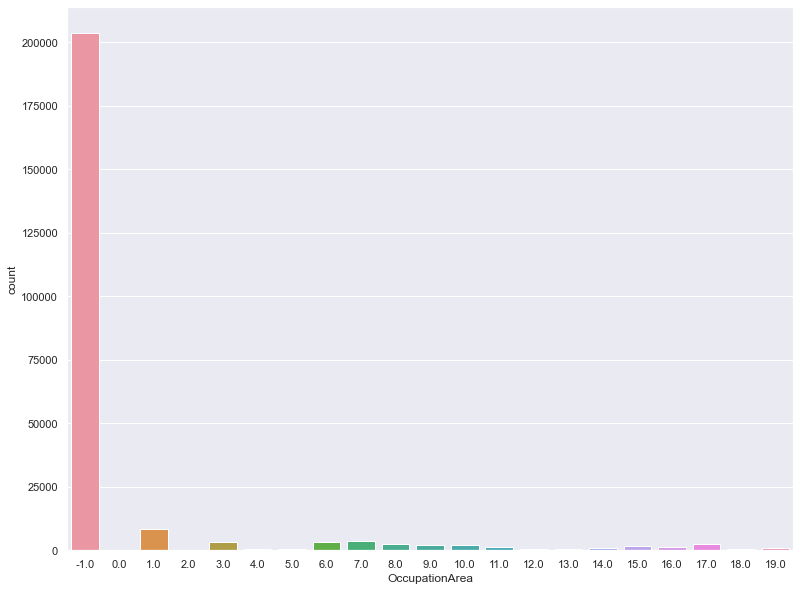

In [167]:
sns.set_theme(style="whitegrid")
sns.set(rc = {'figure.figsize':(13,10)})
ax = sns.countplot(x='OccupationArea', data=df)

In [168]:
df.columns

Index(['Age', 'Gender', 'VerificationType', 'NewCreditCustomer',
       'AppliedAmount', 'UseOfLoan', 'MonthlyPayment', 'Country', 'Interest',
       'LoanDuration', 'Education', 'MaritalStatus', 'EmploymentStatus',
       'EmploymentDurationCurrentEmployer', 'OccupationArea',
       'HomeOwnershipType', 'IncomeTotal', 'ExistingLiabilities',
       'LiabilitiesTotal', 'RefinanceLiabilities', 'DebtToIncome', 'FreeCash',
       'NoOfPreviousLoansBeforeLoan', 'AmountOfPreviousLoansBeforeLoan',
       'PreviousEarlyRepaymentsCountBeforeLoan', 'DefaultStatus'],
      dtype='object')

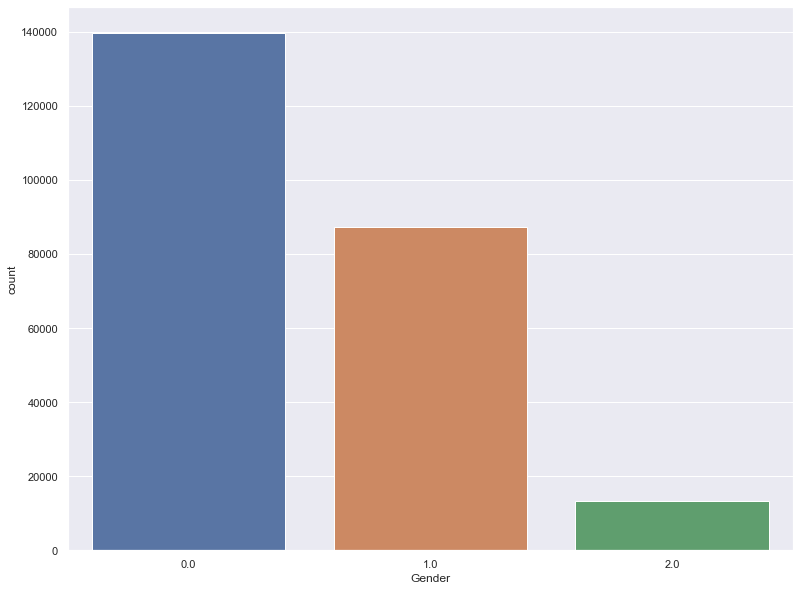

In [169]:
sns.set_theme(style="whitegrid")
sns.set(rc = {'figure.figsize':(13,10)})
ax = sns.countplot(x='Gender', data=df)

In [170]:
df['Gender'].value_counts()/len(df)* 100

0.0    58.131758
1.0    36.318832
2.0     5.530694
Name: Gender, dtype: float64

In [171]:
df['Gender'].value_counts()

0.0    139772
1.0     87325
2.0     13298
Name: Gender, dtype: int64

<AxesSubplot:xlabel='Gender', ylabel='Count'>

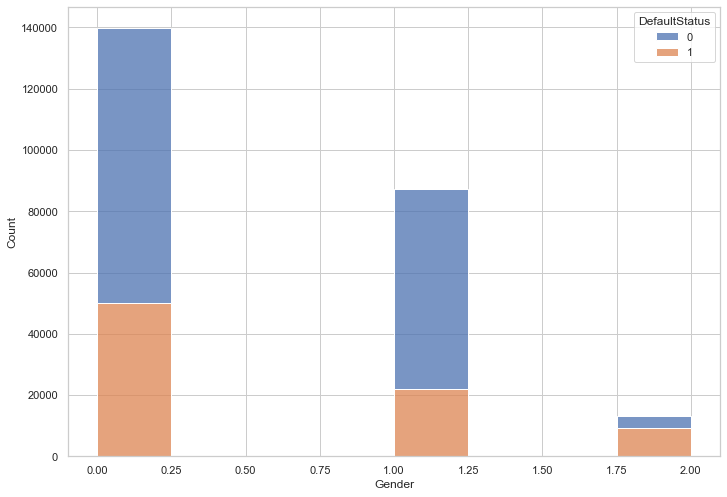

In [172]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style('whitegrid')

plot = df.groupby(['Gender'])['DefaultStatus'].value_counts().reset_index(name='count')
sns.histplot(x = 'Gender' , hue = 'DefaultStatus',weights= 'count', bins=8,
             multiple = 'stack', data=plot)

In [173]:
df.groupby(['Gender'])['DefaultStatus'].value_counts().reset_index(name='count')

,Gender,DefaultStatus,count
0,0.0,0,89878
1,0.0,1,49894
2,1.0,0,65263
3,1.0,1,22062
4,2.0,1,9342
5,2.0,0,3956


In [174]:
df.groupby(['DefaultStatus'])['Gender'].value_counts().reset_index(name='count')

,DefaultStatus,Gender,count
0,0,0.0,89878
1,0,1.0,65263
2,0,2.0,3956
3,1,0.0,49894
4,1,1.0,22062
5,1,2.0,9342


In [175]:
len(df[df['Gender']==0])

139772

In [176]:
89878 + 49894

139772

In [177]:
print(round(len(df[(df['Gender']==0) & (df['DefaultStatus']==0)])/len(df[(df['Gender']==0)]) *100, 3))
print(round(len(df[(df['Gender']==1) & (df['DefaultStatus']==0)])/len(df[(df['Gender']==1)]) *100, 3))
print(round(len(df[(df['Gender']==2) & (df['DefaultStatus']==0)])/len(df[(df['Gender']==2)]) *100, 3))
print(round(len(df[(df['Gender']==0) & (df['DefaultStatus']==1)])/len(df[(df['Gender']==0)]) *100, 3))
print(round(len(df[(df['Gender']==1) & (df['DefaultStatus']==1)])/len(df[(df['Gender']==1)]) *100, 3))
print(round(len(df[(df['Gender']==2) & (df['DefaultStatus']==1)])/len(df[(df['Gender']==2)]) *100, 3))


64.303
74.736
29.749
35.697
25.264
70.251


64% of male borrowers did not default.<br>
74% of female borrowers did not default.<br>
29% of undefined gender borrowers did not default.<br>
35% of male borrowers defaulted.<br>
25% of female borrowers defaulted.<br>

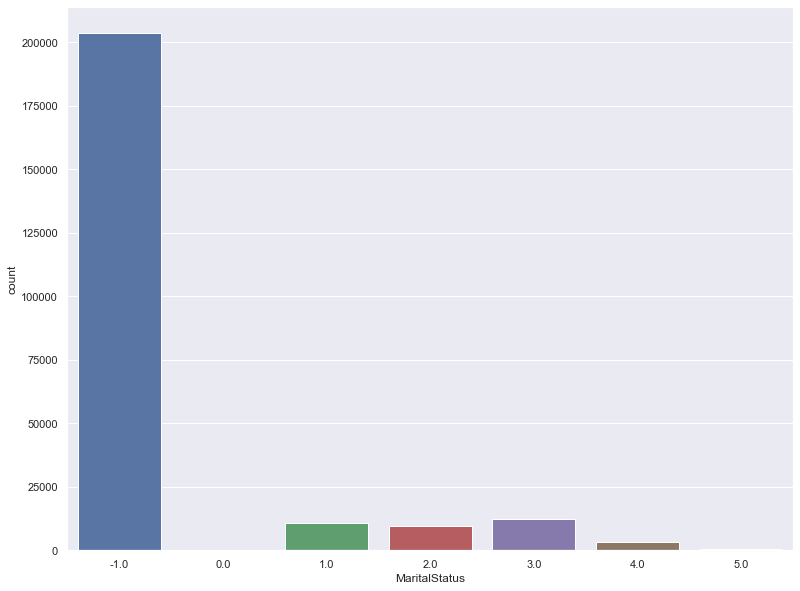

In [178]:
sns.set_theme(style="whitegrid")
sns.set(rc = {'figure.figsize':(13,10)})
ax = sns.countplot(x='MaritalStatus', data=df)

In [179]:
df['MaritalStatus'].value_counts()

-1.0    203852
 3.0     12400
 1.0     10752
 2.0      9400
 4.0      3377
 5.0       601
 0.0         8
Name: MaritalStatus, dtype: int64

In [180]:
df['MaritalStatus'].value_counts()/len(df)* 100

-1.0    84.782898
 3.0     5.157212
 1.0     4.471802
 2.0     3.909499
 4.0     1.404508
 5.0     0.249958
 0.0     0.003327
Name: MaritalStatus, dtype: float64

<AxesSubplot:>

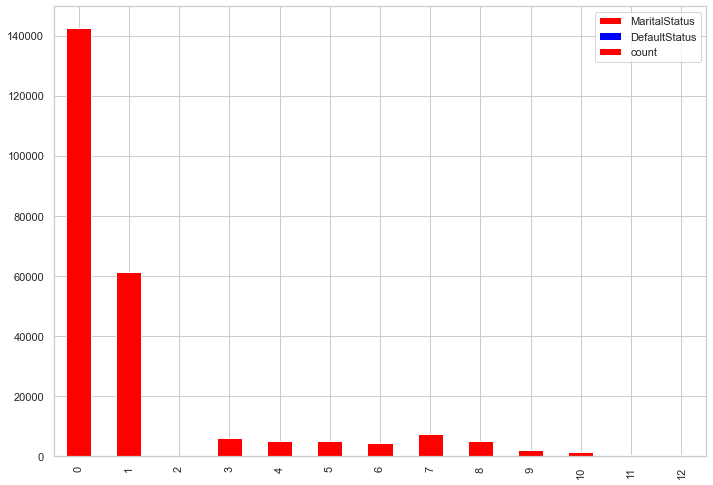

In [181]:
# sns.set(rc={'figure.figsize':(11.7,8.27)})
# sns.set_style('whitegrid')

# plot = df.groupby(['Default'])['MaritalStatus'].value_counts().reset_index(name='count')
# sns.histplot(x = 'Default' , hue = 'MaritalStatus',weights= 'count',
#              multiple = 'stack',data=plot,shrink = 0.7)






sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style('whitegrid')

data = df.groupby(['MaritalStatus'])['DefaultStatus'].value_counts().reset_index(name='count')
# sns.histplot(x = 'MaritalStatus' , hue = 'DefaultStatus',weights= 'count',
#              multiple = 'stack', data=plot)
data.plot(kind='bar', stacked=True, color=['red', 'blue'])

In [182]:
ass = df.groupby(['DefaultStatus'])['MaritalStatus'].value_counts().reset_index(name='count')
ass

,DefaultStatus,MaritalStatus,count
0,0,-1.0,142593
1,0,3.0,5058
2,0,2.0,4895
3,0,1.0,4847
4,0,4.0,1426
5,0,5.0,274
6,1,-1.0,61259
7,1,3.0,7342
8,1,1.0,5905
9,1,2.0,4505


In [183]:
len(df[df['MaritalStatus']==0])

8

69% of unspecified status applicants did not default.

In [184]:
round(len(df[(df['MaritalStatus']==-1) & (df['DefaultStatus']==0)])/len(df[(df['MaritalStatus']==-1)]) *100, 3)

69.949

45% of married  did borrowers ot default.

In [185]:
round(len(df[(df['MaritalStatus']==1) & (df['DefaultStatus']==0)])/len(df[(df['MaritalStatus']==1)]) *100, 3)

45.08

52% of cohabitant borrowers did not default.

In [186]:
round(len(df[(df['MaritalStatus']==2) & (df['DefaultStatus']==0)])/len(df[(df['MaritalStatus']==2)]) *100, 3)

52.074

40.79% of single borrowers did not default.

In [187]:
round(len(df[(df['MaritalStatus']==3) & (df['DefaultStatus']==0)])/len(df[(df['MaritalStatus']==3)]) *100, 3)

40.79

42% of divorced borrowers did not default.

In [188]:
round(len(df[(df['MaritalStatus']==4) & (df['DefaultStatus']==0)])/len(df[(df['MaritalStatus']==4)]) *100, 3)

42.227

45.59% of widow applicants did not default.

In [189]:
round(len(df[(df['MaritalStatus']==5) & (df['DefaultStatus']==0)])/len(df[(df['MaritalStatus']==5)]) *100, 3)

45.591

30% of unspecified status applicants defaulted.

In [190]:
round(len(df[(df['MaritalStatus']==-1) & (df['DefaultStatus']==1)])/len(df[(df['MaritalStatus']==-1)]) *100, 3)

30.051

54.92% of married applicants defaulted.

In [191]:
round(len(df[(df['MaritalStatus']==1) & (df['DefaultStatus']==1)])/len(df[(df['MaritalStatus']==1)]) *100, 3)

54.92

47.926% of cohabitant applicant defaulted.

In [192]:
round(len(df[(df['MaritalStatus']==2) & (df['DefaultStatus']==1)])/len(df[(df['MaritalStatus']==2)]) *100, 3)

47.926

59.21% of single applicants defaulted.

In [193]:
round(len(df[(df['MaritalStatus']==3) & (df['DefaultStatus']==1)])/len(df[(df['MaritalStatus']==3)]) *100, 3)

59.21

57.773% of divorced applicants defaulted.

In [194]:
round(len(df[(df['MaritalStatus']==4) & (df['DefaultStatus']==1)])/len(df[(df['MaritalStatus']==4)]) *100, 3)

57.773

54% of divorced applicants defaulted.

In [195]:
round(len(df[(df['MaritalStatus']==5) & (df['DefaultStatus']==1)])/len(df[(df['MaritalStatus']==5)]) *100, 3)

54.409

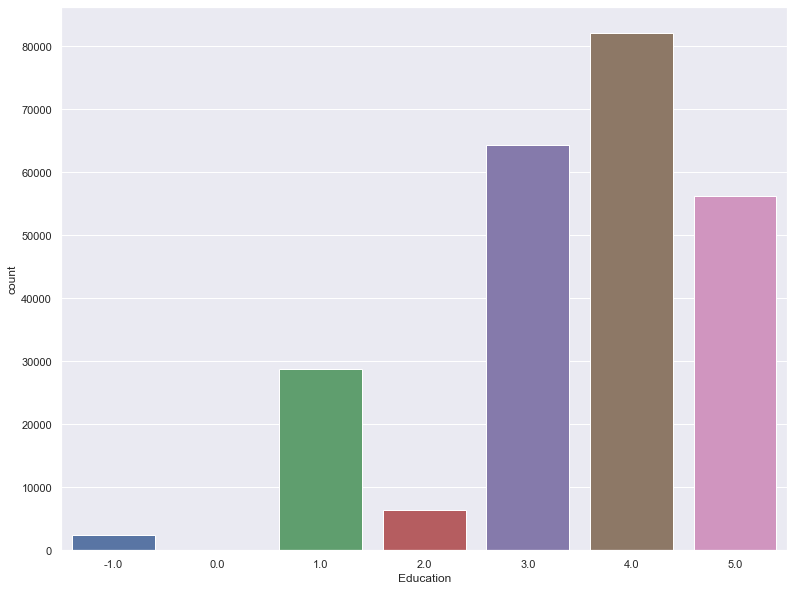

In [196]:
sns.set_theme(style="whitegrid")
sns.set(rc = {'figure.figsize':(13,10)})
ax = sns.countplot(x='Education', data=df)

In [197]:
df['Education'].value_counts()

 4.0    82152
 3.0    64287
 5.0    56226
 1.0    28792
 2.0     6444
-1.0     2481
 0.0        8
Name: Education, dtype: int64

In [198]:
df['Education'].value_counts()/len(df)* 100

 4.0    34.167360
 3.0    26.737232
 5.0    23.384628
 1.0    11.974713
 2.0     2.680087
-1.0     1.031858
 0.0     0.003327
Name: Education, dtype: float64

c:\Users\EliteBook\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:385: UserWarning: `bins` cannot be 'auto' when using weights. Setting `bins=10`, but you will likely want to adjust.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='DefaultStatus', ylabel='Count'>

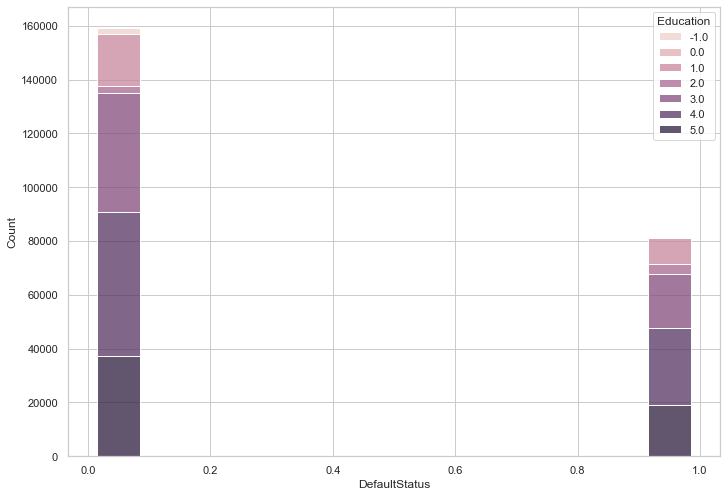

In [199]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style('whitegrid')

plot = df.groupby(['DefaultStatus'])['Education'].value_counts().reset_index(name='count')
sns.histplot(x = 'DefaultStatus' , hue = 'Education',weights= 'count',
             multiple = 'stack',data=plot,shrink = 0.7)

In [200]:
df.groupby(['DefaultStatus'])['Education'].value_counts().reset_index(name='count')

,DefaultStatus,Education,count
0,0,4.0,53494
1,0,3.0,44377
2,0,5.0,37134
3,0,1.0,19324
4,0,2.0,2490
5,0,-1.0,2274
6,1,4.0,28658
7,1,3.0,19910
8,1,5.0,19092
9,1,1.0,9468


In [201]:
round(len(df[(df['Education']==-1) & (df['DefaultStatus']==0)])/len(df[(df['Education']==-1)]) *100, 3)

91.657

67% of applicant with primary education did not default.

In [202]:
round(len(df[(df['Education']==1) & (df['DefaultStatus']==0)])/len(df[(df['Education']==1)]) *100, 3)

67.116

38.6% of applicants with Basic Education did not default.

In [203]:
round(len(df[(df['Education']==2) & (df['DefaultStatus']==0)])/len(df[(df['Education']==2)]) *100, 3)

38.641

69% of applicant with vocational education did not default.

In [204]:
round(len(df[(df['Education']==3) & (df['DefaultStatus']==0)])/len(df[(df['Education']==3)]) *100, 3)

69.03

65% of applicant with Secondary education did not default.

In [205]:
round(len(df[(df['Education']==4) & (df['DefaultStatus']==0)])/len(df[(df['Education']==4)]) *100, 3)

65.116

66% of applicant with Higher Education did not default. 

In [206]:
round(len(df[(df['Education']==5) & (df['DefaultStatus']==0)])/len(df[(df['Education']==5)]) *100, 3)

66.044

In [207]:
round(len(df[(df['Education']==-1) & (df['DefaultStatus']==1)])/len(df[(df['Education']==-1)]) *100, 3)

8.343

33% of applicant with primary education defaulted.

In [208]:
round(len(df[(df['Education']==1) & (df['DefaultStatus']==1)])/len(df[(df['Education']==1)]) *100, 3)

32.884

61% of applicant with Basic Education defaulted.

In [209]:
round(len(df[(df['Education']==2) & (df['DefaultStatus']==1)])/len(df[(df['Education']==2)]) *100, 3)

61.359

31% of applicants with Secondary education defaulted.

In [210]:
round(len(df[(df['Education']==3) & (df['DefaultStatus']==1)])/len(df[(df['Education']==3)]) *100, 3)

30.97

35% of applicants with 

In [211]:
round(len(df[(df['Education']==4) & (df['DefaultStatus']==1)])/len(df[(df['Education']==4)]) *100, 3)

34.884

In [212]:
round(len(df[(df['Education']==5) & (df['DefaultStatus']==1)])/len(df[(df['Education']==5)]) *100, 3)

33.956

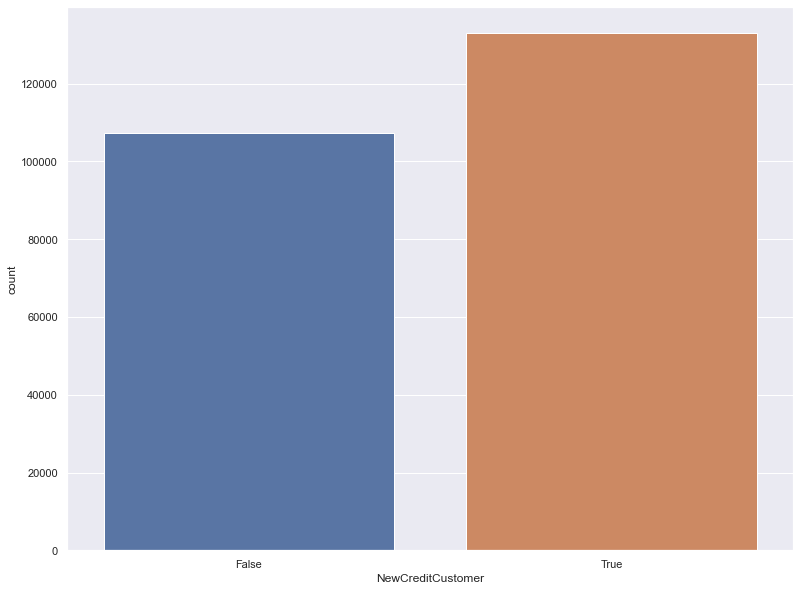

In [213]:
sns.set_theme(style="whitegrid")
sns.set(rc = {'figure.figsize':(13,10)})
ax = sns.countplot(x='NewCreditCustomer', data=df)

In [214]:
df['NewCreditCustomer'].value_counts()

True     133121
False    107319
Name: NewCreditCustomer, dtype: int64

In [215]:
df['NewCreditCustomer'].value_counts()/len(df)* 100

True     55.36558
False    44.63442
Name: NewCreditCustomer, dtype: float64

c:\Users\EliteBook\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:385: UserWarning: `bins` cannot be 'auto' when using weights. Setting `bins=10`, but you will likely want to adjust.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='DefaultStatus', ylabel='Count'>

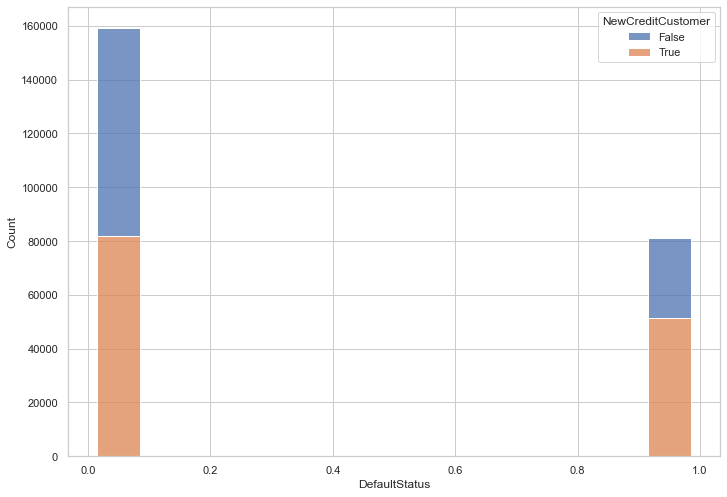

In [216]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style('whitegrid')

plot = df.groupby(['DefaultStatus'])['NewCreditCustomer'].value_counts().reset_index(name='count')
sns.histplot(x = 'DefaultStatus' , hue = 'NewCreditCustomer',weights= 'count',
             multiple = 'stack',data=plot,shrink = 0.7)

In [217]:
df.groupby(['DefaultStatus'])['NewCreditCustomer'].value_counts().reset_index(name='count')

,DefaultStatus,NewCreditCustomer,count
0,0,True,81725
1,0,False,77398
2,1,True,51396
3,1,False,29921


In [218]:
round(len(df[(df['NewCreditCustomer']==True) & (df['DefaultStatus']==0)])/len(df[(df['NewCreditCustomer']==True)]) *100, 3)

61.392

In [219]:
round(len(df[(df['NewCreditCustomer']==False) & (df['DefaultStatus']==0)])/len(df[(df['NewCreditCustomer']==False)]) *100, 3)

72.12

In [220]:
round(len(df[(df['NewCreditCustomer']==True) & (df['DefaultStatus']==1)])/len(df[(df['NewCreditCustomer']==True)]) *100, 3)

38.608

In [221]:
round(len(df[(df['NewCreditCustomer']==False) & (df['DefaultStatus']==1)])/len(df[(df['NewCreditCustomer']==False)]) *100, 3)

27.88

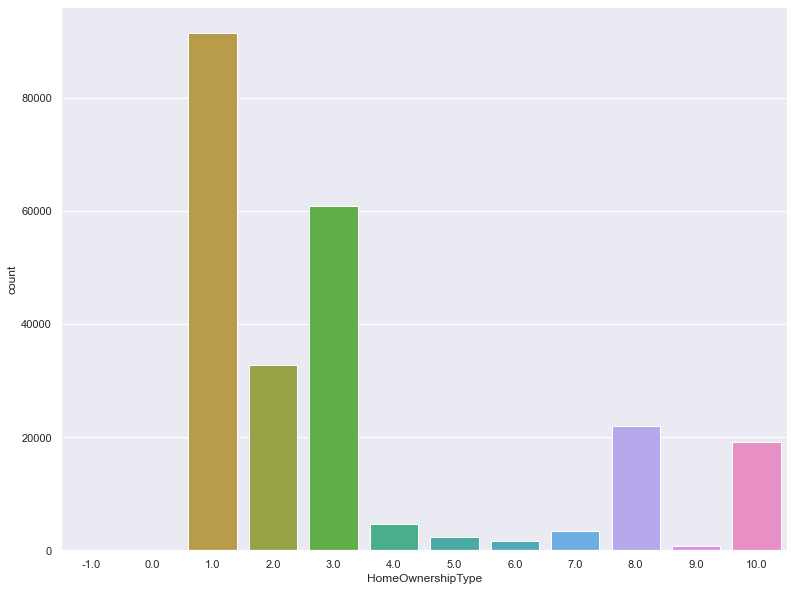

In [222]:
sns.set_theme(style="whitegrid")
sns.set(rc = {'figure.figsize':(13,10)})
ax = sns.countplot(x='HomeOwnershipType', data=df)

In [223]:
df['HomeOwnershipType'].value_counts()

 1.0     91484
 3.0     60927
 2.0     32729
 8.0     21924
 10.0    19089
 4.0      4587
 7.0      3346
 5.0      2284
 6.0      1619
 9.0       745
 0.0        46
-1.0         3
Name: HomeOwnershipType, dtype: int64

In [224]:
df['HomeOwnershipType'].value_counts()/len(df)* 100

 1.0     38.048578
 3.0     25.339794
 2.0     13.612128
 8.0      9.118283
 10.0     7.939195
 4.0      1.907752
 7.0      1.391615
 5.0      0.949925
 6.0      0.673349
 9.0      0.309849
 0.0      0.019132
-1.0      0.001248
Name: HomeOwnershipType, dtype: float64

c:\Users\EliteBook\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:385: UserWarning: `bins` cannot be 'auto' when using weights. Setting `bins=10`, but you will likely want to adjust.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='DefaultStatus', ylabel='Count'>

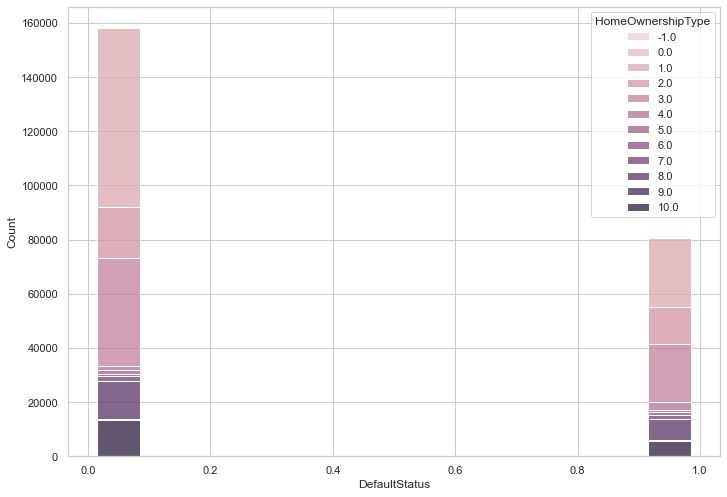

In [225]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style('whitegrid')

plot = df.groupby(['DefaultStatus'])['HomeOwnershipType'].value_counts().reset_index(name='count')
sns.histplot(x = 'DefaultStatus' , hue = 'HomeOwnershipType',weights= 'count',
             multiple = 'stack',data=plot,shrink = 0.7)

In [226]:
df.groupby(['DefaultStatus'])['HomeOwnershipType'].value_counts().reset_index(name='count')

,DefaultStatus,HomeOwnershipType,count
0,0,1.0,66044
1,0,3.0,39713
2,0,2.0,18900
3,0,8.0,14020
4,0,10.0,13529
5,0,7.0,1784
6,0,4.0,1613
7,0,5.0,1370
8,0,6.0,679
9,0,9.0,422


8.7% of homeless applicants did not default.

In [227]:
round(len(df[(df['HomeOwnershipType']==0) & (df['DefaultStatus']==0)])/len(df[(df['HomeOwnershipType']==0)]) *100, 3)

8.696

72% of applicants who owners of their homes did not default.

In [228]:
round(len(df[(df['HomeOwnershipType']==1) & (df['DefaultStatus']==0)])/len(df[(df['HomeOwnershipType']==1)]) *100, 3)

72.192

54.7% of applicants living with their parents did not default.

In [229]:
round(len(df[(df['HomeOwnershipType']==2) & (df['DefaultStatus']==0)])/len(df[(df['HomeOwnershipType']==2)]) *100, 3)

57.747

65% of applicants who are tenants with pre-furnished property did not default.

In [230]:
round(len(df[(df['HomeOwnershipType']==3) & (df['DefaultStatus']==0)])/len(df[(df['HomeOwnershipType']==3)]) *100, 3)

65.181

35% of applicants who are tenants with unfurnished property did not default.

In [231]:
round(len(df[(df['HomeOwnershipType']==4) & (df['DefaultStatus']==0)])/len(df[(df['HomeOwnershipType']==4)]) *100, 3)

35.165

60% of applicants living in council house did not default.

In [232]:
round(len(df[(df['HomeOwnershipType']==5) & (df['DefaultStatus']==0)])/len(df[(df['HomeOwnershipType']==5)]) *100, 3)

59.982

41.9% of applicants with joint tenant did not default.

In [233]:
round(len(df[(df['HomeOwnershipType']==6) & (df['DefaultStatus']==0)])/len(df[(df['HomeOwnershipType']==6)]) *100, 3)

41.939

53% of applicants with joint ownership did not default.

In [234]:
round(len(df[(df['HomeOwnershipType']==7) & (df['DefaultStatus']==0)])/len(df[(df['HomeOwnershipType']==7)]) *100, 3)

53.317

64% of applicants with Mortgage did not default.

In [235]:
round(len(df[(df['HomeOwnershipType']==8) & (df['DefaultStatus']==0)])/len(df[(df['HomeOwnershipType']==8)]) *100, 3)

63.948

56% of applicants who are owners with encumbrance did not default.

In [236]:
round(len(df[(df['HomeOwnershipType']==9) & (df['DefaultStatus']==0)])/len(df[(df['HomeOwnershipType']==9)]) *100, 3)

56.644

70% of applicants with other HomeOwnershipTyoe did not default.

In [237]:
round(len(df[(df['HomeOwnershipType']==10) & (df['DefaultStatus']==0)])/len(df[(df['HomeOwnershipType']==10)]) *100, 3)

70.873

91% of applicants who are homeless defaulted.

In [238]:
round(len(df[(df['HomeOwnershipType']==0) & (df['DefaultStatus']==1)])/len(df[(df['HomeOwnershipType']==0)]) *100, 3)

91.304

27.808% of applicants who are owners defaulted.

In [239]:
round(len(df[(df['HomeOwnershipType']==1) & (df['DefaultStatus']==1)])/len(df[(df['HomeOwnershipType']==1)]) *100, 3)

27.808

42.3% of applicants living with their parents defaulted.

In [240]:
round(len(df[(df['HomeOwnershipType']==2) & (df['DefaultStatus']==1)])/len(df[(df['HomeOwnershipType']==2)]) *100, 3)

42.253

35% of applicants who are tenants with pre-furnished property defaulted.

In [241]:
round(len(df[(df['HomeOwnershipType']==3) & (df['DefaultStatus']==1)])/len(df[(df['HomeOwnershipType']==3)]) *100, 3)

34.819

65% of applicants who are tenants with unfurnished property defaulted.

In [242]:
round(len(df[(df['HomeOwnershipType']==4) & (df['DefaultStatus']==1)])/len(df[(df['HomeOwnershipType']==4)]) *100, 3)

64.835

40% of appllicants living in council houses defaulted.

In [243]:
round(len(df[(df['HomeOwnershipType']==5) & (df['DefaultStatus']==1)])/len(df[(df['HomeOwnershipType']==5)]) *100, 3)

40.018

58% of applicants with joint tenants defaulted.

In [244]:
round(len(df[(df['HomeOwnershipType']==6) & (df['DefaultStatus']==1)])/len(df[(df['HomeOwnershipType']==6)]) *100, 3)

58.061

46.7% of applicants with Joint Ownership defaulted.

In [245]:
round(len(df[(df['HomeOwnershipType']==7) & (df['DefaultStatus']==1)])/len(df[(df['HomeOwnershipType']==7)]) *100, 3)

46.683

36& of applicants with Mortgage defaulted.

In [246]:
round(len(df[(df['HomeOwnershipType']==8) & (df['DefaultStatus']==1)])/len(df[(df['HomeOwnershipType']==8)]) *100, 3)

36.052

43% of applicants who are owners with encumbrance defaulted.

In [247]:
round(len(df[(df['HomeOwnershipType']==9) & (df['DefaultStatus']==1)])/len(df[(df['HomeOwnershipType']==9)]) *100, 3)

43.356

29% of applicants with other HomeOwnershipTyoe defaulted.

In [248]:
round(len(df[(df['HomeOwnershipType']==10) & (df['DefaultStatus']==1)])/len(df[(df['HomeOwnershipType']==10)]) *100, 3)

29.127

In [249]:
df['UseOfLoan'].value_counts()

-1      203852
 7        9700
 2        9191
 0        6914
 6        3151
 3        1952
 5        1787
 8        1519
 4        1366
 1         955
 102        21
 110        17
 104         6
 101         5
 107         2
 108         1
 106         1
Name: UseOfLoan, dtype: int64

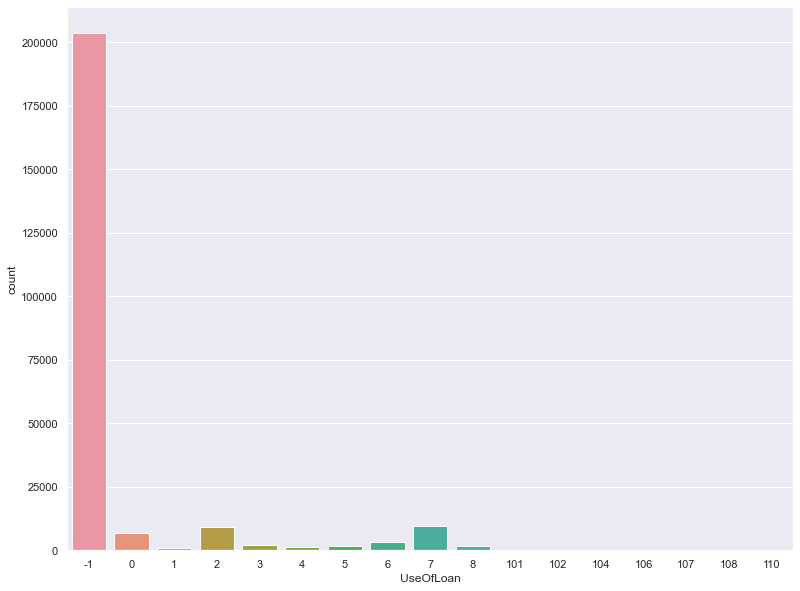

In [250]:
sns.set_theme(style="whitegrid")
sns.set(rc = {'figure.figsize':(13,10)})
ax = sns.countplot(x='UseOfLoan', data=df)

In [251]:
df['UseOfLoan'].value_counts()/len(df)* 100

-1      84.782898
 7       4.034271
 2       3.822575
 0       2.875561
 6       1.310514
 3       0.811845
 5       0.743221
 8       0.631758
 4       0.568125
 1       0.397188
 102     0.008734
 110     0.007070
 104     0.002495
 101     0.002080
 107     0.000832
 108     0.000416
 106     0.000416
Name: UseOfLoan, dtype: float64